In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
user_data = pd.read_csv('user_features.csv', index_col = 0)


In [80]:
user_data_top = user_data[user_data['num_businesses'] > 30]
low_variance_feats = []
for feat in user_data_top.columns:
    # print(f'{feat}:\t {user_data_top[feat].mean()} \t {user_data_top[feat].std()}')
    if user_data_top[feat].std() < 0.1:
        low_variance_feats.append(feat)

In [82]:
len(low_variance_feats)

59

In [84]:
user_top_hivar = user_data_top.drop(low_variance_feats, axis = 1)

In [89]:
corr_matrix = user_top_hivar.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [90]:
len(to_drop)

9

In [91]:
for feature in to_drop: 
    print(feature +' , ' +upper[feature].idxmax())
    print(upper[feature].max())

Caterers , Barbeque
0.9595260227263585
Chicken Wings , Barbeque
0.9606372768954673
Delis , Caterers
0.9606000981198175
Desserts , Bakeries
0.9557688111458111
Diners , Delis
0.9604382997210662
Specialty Food , Delis
0.953872685401627
Sports Bars , Chicken Wings
0.964133758238003
Sushi Bars , Japanese
0.9816192065635495
RestaurantsCounterService , Diners
0.9798933339457342


In [23]:
user_data_top[['Barbeque','Bakeries']]

,Barbeque,Bakeries
user_id,,
b'--u09WAjW741FdfkJXxNmg',-0.881356,-0.813559
b'-0KrCHEsOcjJ6N4k_k1A9A',-0.818182,-0.878788
b'-1C-Lu0NTlYi4XB82ntKtg',-0.437500,-0.437500
b'-1MF2tosrw2WcCxeVNk81Q',-0.261905,-0.595238
b'-1awBy86Qgr3aN30_Z3xGw',-1.404762,-1.595238
...,...,...
b'zxyKewY6p0CjnFprEutaog',-0.921569,-0.921569
b'zy0el7c-IO4BvjxUgj-ZSw',-1.181818,-1.121212
b'zyNrXvJyYdC34tS6BcCykA',-1.240000,-0.800000


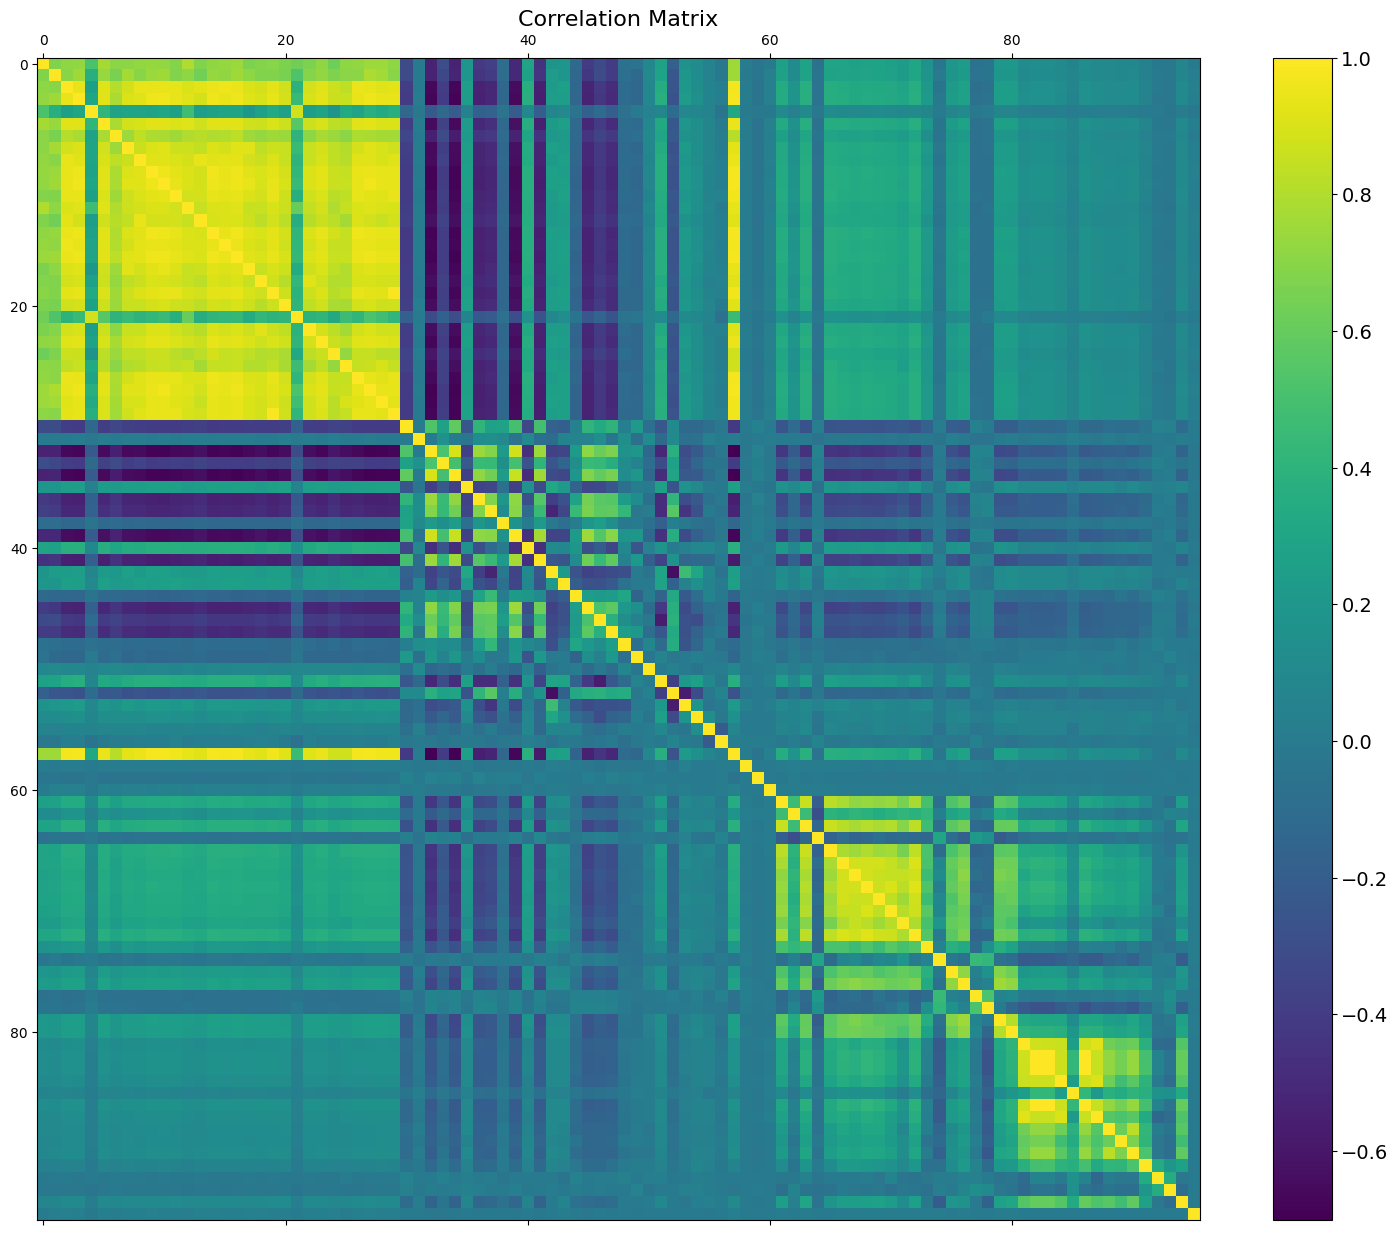

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(user_data_top.corr(), fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Try DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [33]:
X = StandardScaler().fit_transform(user_data_top)

In [37]:
user_top_standard = pd.DataFrame(X,columns = user_data_top.columns, index = user_data_top.index)

,American (New),American (Traditional),Bakeries,Barbeque,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,Music.video,Music.karaoke,BestNights.monday,BestNights.tuesday,BestNights.wednesday,BestNights.thursday,BestNights.friday,BestNights.saturday,BestNights.sunday,num_businesses
user_id,,,,,,,,,,,,,,,,,,,,,
b'--u09WAjW741FdfkJXxNmg',0.434758,-0.806088,-0.090526,-0.193387,0.463020,-0.135139,0.085712,-0.302359,0.729303,-0.307555,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.048133
b'-0KrCHEsOcjJ6N4k_k1A9A',0.269425,-0.550769,-0.245675,-0.045372,-0.450731,-0.837801,-1.226555,-0.386191,-0.817276,-0.942853,...,-1.399625,0.283824,-1.587749,2.109424,-1.584101,-1.648373,-1.850401,1.879073,-1.634616,-0.606825
b'-1C-Lu0NTlYi4XB82ntKtg',0.890485,0.443351,0.803945,0.846559,1.341532,1.033261,1.634156,0.794587,0.581308,0.980027,...,3.920557,4.438469,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.628313
b'-1MF2tosrw2WcCxeVNk81Q',-0.049652,0.498487,0.428759,1.257976,-0.204935,0.683410,0.401545,0.499936,0.581308,0.568626,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.413432
b'-1awBy86Qgr3aN30_Z3xGw',0.666643,0.792546,-1.949779,-1.419719,0.122793,-1.698557,-0.468533,-0.264566,-1.675867,-1.814662,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.413432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'zxyKewY6p0CjnFprEutaog',-0.728025,0.450918,-0.347430,-0.287605,0.089057,-0.588140,-0.336315,-0.290799,-0.568244,-0.416066,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.220038
b'zy0el7c-IO4BvjxUgj-ZSw',-2.283188,-1.673539,-0.822290,-0.897365,-1.910611,-1.292540,-1.041993,-0.386191,-0.968474,-0.798411,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.606825
b'zyNrXvJyYdC34tS6BcCykA',-1.192858,-1.239401,-0.058275,-1.033684,-0.404849,-0.386093,-0.071197,-0.710525,-1.165032,-0.986186,...,0.337578,0.283824,0.272238,0.235826,0.281291,0.211890,0.026035,-0.002545,0.212661,-0.241526


In [116]:
db = DBSCAN(eps=0.1, min_samples=10).fit(user_top_hivar.iloc[:,:5])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 7824


In [117]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [126]:
np.sum(db.labels_ == 5)

11